In [1]:
#field 33: outer LMC cluster in it NGC 1841 (should be distance of LMC)

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude
from scipy import stats
from astropy.table import Table, Column
from astropy.io import ascii, fits
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
from scipy.stats import kde
import matplotlib.colors as clr
import fitsio
from fitsio import FITS,FITSHDR


### Isolate NGC 1841 in field 33

In [3]:
cat = fits.getdata('/Users/amyel/wget/smash.datalab.noao.edu/cp/red/photred/catalogs/final/v6/Field33_combined_allobj.fits.gz',1)


/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


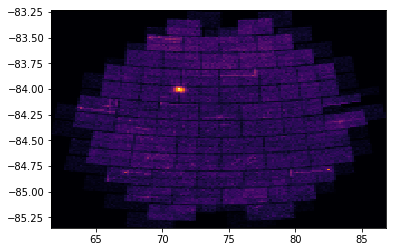

In [4]:
hess = stats.binned_statistic_2d(cat['ra'], cat['dec'], None, 'count',bins=150)
plt.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
plt.show()

In [5]:
center = SkyCoord('04h45m23.3s','-83d59m57s')

In [6]:
center.ra.deg

71.34708333333333

In [7]:
center.dec.deg

-83.99916666666667

In [8]:
field = SkyCoord(cat['ra'],cat['dec'],unit='deg')

In [9]:
sep = field.separation(center)

In [10]:
sep = sep.degree

In [11]:
radius = -83.969 - center.dec.deg

In [12]:
radius

0.030166666666673336

In [13]:
ind, = np.where(sep < radius)

In [14]:
clustercat = cat[ind]

In [15]:
u_g = clustercat['U']-clustercat['G']
g_r = clustercat['G']-clustercat['R']
g_i = clustercat['G']-clustercat['I']

In [16]:
u_g_cut = u_g[~np.isnan(u_g)]
g_r_cut = g_r[~np.isnan(u_g)]
g_r= g_r_cut[~np.isnan(g_r_cut)]
u_g = u_g_cut[~np.isnan(g_r_cut)]



/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


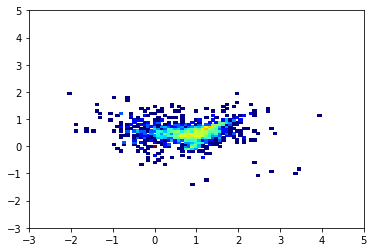

In [17]:
hess = stats.binned_statistic_2d(u_g, g_r, None, 'count',bins=2000)
plt.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='jet',norm=clr.LogNorm())
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.show()

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


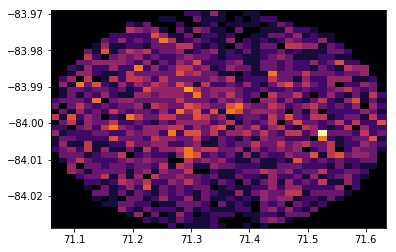

In [22]:
hess = stats.binned_statistic_2d(clustercat['ra'], clustercat['dec'], None, 'count',bins=40)
plt.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
plt.show()

In [23]:
#creat fits file with star data
array_list = [clustercat['RA'],clustercat['DEC'],clustercat['U'],clustercat['UERR'],clustercat['G'],clustercat['GERR'],clustercat['R'],clustercat['RERR'],clustercat['I'],clustercat['IERR'],clustercat['Z'],clustercat['ZERR'],clustercat['EBV'],clustercat['CHI'],clustercat['SHARP'],clustercat['PROB']]
names = ['RA','DEC','U','UERR','G','GERR','R','RERR','I','IERR','Z','ZERR','EBV','CHI','SHARP','PROB']
fitsio.write('~/research/SMASH_project/datafiles/NGC1841_stars.fits',array_list,names=names)

